#MNIST

In [ ]:
# Import necessary libraries
import tensorflow as tf

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Display the shape of the datasets
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


#PCA

In [ ]:
from sklearn.decomposition import PCA

def compute_PCA(x):
  desired_info_percentage = 5#0.95

  # Create an instance of PCA with the desired percentage of information
  pca = PCA(n_components=desired_info_percentage)

  # Fit PCA on the selected training data
  pca.fit(x)

  # Transform the data to the reduced dimensionality
  X_pca = pca.transform(x)

  return X_pca

#PLOT

In [ ]:
import matplotlib.pyplot as plt

def plot_Dataset(x, y):
  # Plot data points with labels
  plt.figure(figsize=(10, 6))
  plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis', marker='o', edgecolors='k', label='Data Points')
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.title('Data Points with Labels')
  plt.colorbar(label='Labels')
  plt.legend()
  plt.grid(True)
  plt.show()

#Creating New Dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
import numpy as np
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def create_Dataset(x_train, y_train, x_test, y_test):


  X = x_train.reshape(x_train.shape[0], -1)  # Flatten the images



  print("X.shape: ", X.shape)
  # print("flag.shape: ", flag.shape)

  y = y_train
  X_test = x_test.reshape(x_test.shape[0], -1)
  yt = y_test

  # Define the classes to select
  selected_classes = [0, 6]

  # Find the indices of samples belonging to the selected classes
  selected_indices_train = np.isin(y_train, selected_classes)
  selected_indices_test = np.isin(y_test, selected_classes)

  # Select the samples and corresponding labels from the dataset
  X_selected_train = X[selected_indices_train]

  y_selected_train = y_train[selected_indices_train]

  X_selected_test = X_test[selected_indices_test]
  y_selected_test = y_test[selected_indices_test]

  y_selected_train[y_selected_train == 6] = 1 # Assign label 6 to lable 1
  y_selected_test[y_selected_test == 6] = 1
  # Define the class to select
  selected_class = 8

  # Find the indices of samples belonging to the selected class
  selected_indices_train = np.where(y_train == selected_class)[0]

  # Shuffle the indices randomly
  np.random.shuffle(selected_indices_train)

  # Select the first 50 samples
  set1_indices = selected_indices_train[:50]
  set1_data = X[set1_indices]
  set1_labels = np.zeros(50)  # Assign label 0 to set1

  # Select the next 50 samples
  set2_indices = selected_indices_train[50:100]
  set2_data = X[set2_indices]
  set2_labels = np.ones(50)  # Assign label 1 to set2

  flag = np.zeros((X_selected_train.shape[0],))
  flag8 = np.ones((100,))
  # flag82 = np.zeros((set2_data.shape[0],))
  print("X_selected_train.shape: ", X_selected_train.shape)
  print("y_selected_train.shape: ", y_selected_train.shape)
  # Combine the sets and labels with existing data
  X_selected_train = np.concatenate((X_selected_train, set1_data, set2_data), axis=0)
  y_selected_train = np.concatenate((y_selected_train, set1_labels, set2_labels), axis=0)
  flag = np.concatenate((flag, flag8), axis=0)
    # flag82 = np.zeros((set2_data.shape[0],))
  print("X_selected_train.shape: ", X_selected_train.shape)
  print("y_selected_train.shape: ", y_selected_train.shape)
  #apply PCA
  X_selected_train_pca=compute_PCA(X_selected_train)
  X_selected_test_pca=compute_PCA(X_selected_test)

  # Standardize the data
  scaler = MinMaxScaler()
  scaler.fit(X_selected_train_pca)
  # Transform the data
  X_selected_train_pca = scaler.transform(X_selected_train_pca)

  scaler.fit(X_selected_test_pca)
  # Transform the data
  X_selected_test_pca = scaler.transform(X_selected_test_pca)
  # X_selected_train_pca = scaler.fit_transform(X_selected_train_pca)

  return X_selected_train_pca, y_selected_train, X_selected_test_pca, y_selected_test, flag

In [ ]:
x_train, y_train, x_test, y_test, flag = create_Dataset(x_train, y_train, x_test, y_test)

X.shape:  (60000, 784)
X_selected_train.shape:  (11841, 784)
y_selected_train.shape:  (11841,)
X_selected_train.shape:  (11941, 784)
y_selected_train.shape:  (11941,)


In [ ]:
flag.shape, y_train.shape, x_train.shape

((11941,), (11941,), (11941, 5))

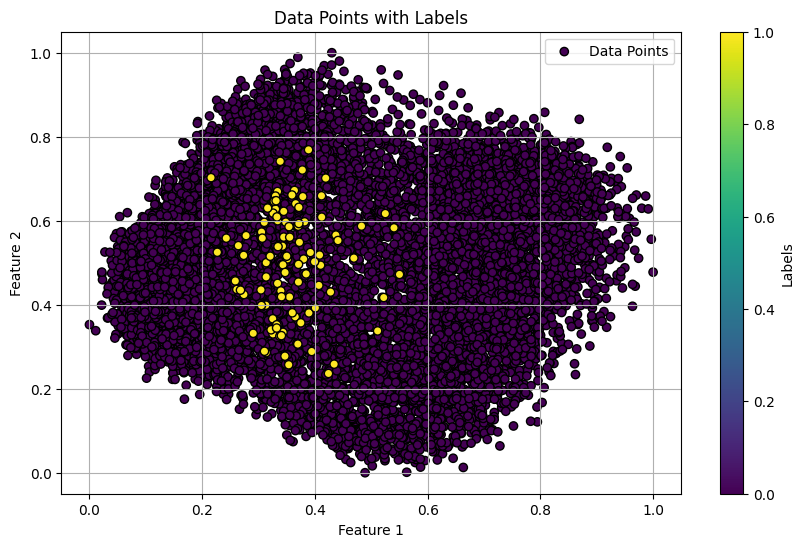

In [ ]:
plot_Dataset(x_train,flag)

In [ ]:
X=x_train
Y=y_train
Xt=x_test
Yt=y_test

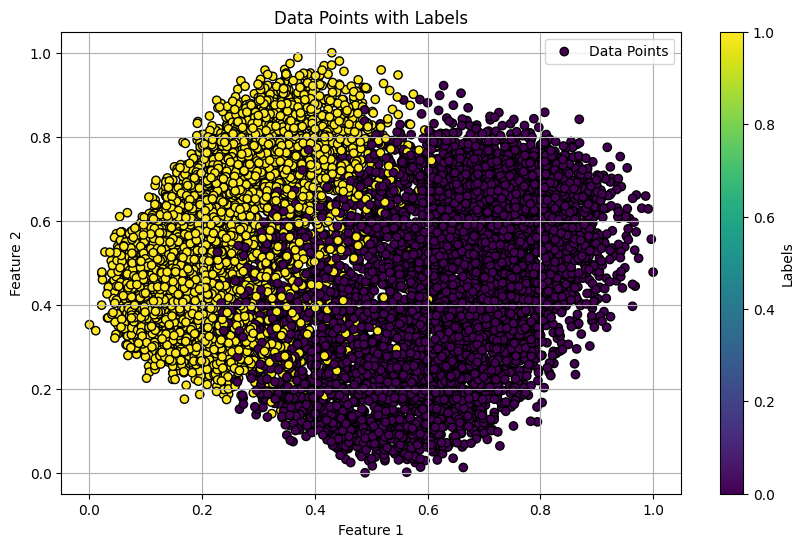

In [ ]:
plot_Dataset(x_train,y_train)

#GMM

In [ ]:
import numpy as np

class GaussianMixtureModel:
    def __init__(self):
        pass

    def gaussian(self, x, mean, cov):
        d = len(mean)
        exponent = (-0.5 * np.dot(np.dot((x - mean).T, np.linalg.inv(cov)), (x - mean)))
        coefficient = (1 / np.sqrt(((2 * np.pi) ** d) * np.linalg.det(cov)))
        return coefficient * np.exp(exponent)

    def estimate_parameters(self, data, k, centroid=None):
        n_samples, n_features = data.shape
        if centroid is not None:
            means = [centroid[0], centroid[1]]
        else:
            means = np.random.rand(k, n_features)
        covariances = [np.eye(n_features) for _ in range(k)]
        weights = np.ones(k) / k

        for _ in range(200):
            responsibilities = np.zeros((n_samples, k))
            for j in range(k):
                for i in range(n_samples):
                    responsibilities[i, j] = weights[j] * self.gaussian(data[i], means[j], covariances[j])
            responsibilities /= np.sum(responsibilities, axis=1, keepdims=True)

            for j in range(k):
                Nj = np.sum(responsibilities[:, j])
                means[j] = np.sum(data * responsibilities[:, j][:, np.newaxis], axis=0) / Nj
                covariances[j] = np.dot((data - means[j]).T, (data - means[j]) * responsibilities[:, j][:, np.newaxis]) / Nj
                weights[j] = Nj / n_samples

        return means, covariances, weights

    def gmm_predict(self, data, means, covariances, weights):
        k = len(means)
        probabilities = np.zeros(len(data))

        for j in range(k):
            diffn = data - means[j]
            diff = np.array(diffn)
            exponent = -0.5 * np.sum(np.dot(diff, np.linalg.inv(covariances[j])) * diff, axis=1)
            pdf = (1.0 / np.sqrt((2 * np.pi) ** len(means[j]) * np.linalg.det(covariances[j]))) * np.exp(exponent)
            probabilities += weights[j] * pdf

        return 1 - probabilities


In [ ]:
import numpy as np

# Example data
data =x_train #np.random.randn(100, 2)  # Generate random 2D data

# Initialize GaussianMixtureModel object
gmm_model = GaussianMixtureModel()

# Estimate parameters (means, covariances, weights) of the Gaussian Mixture Model
means, covariances, weights = gmm_model.estimate_parameters(data, k=2)

# Predict outlier probabilities
outlier_probabilities = gmm_model.gmm_predict(data, means, covariances, weights)

# Print the first 10 outlier probabilities
# print("Outlier Probabilities (first 10):", outlier_probabilities[:10])


In [ ]:
import numpy as np

def calculate_likelihood(data, means, covariances, weights):
    """
    Calculate the likelihood of each data point belonging to each cluster in a Gaussian Mixture Model.

    Parameters:
    - data: Input data points (numpy array).
    - means: Means of the Gaussian components (list of numpy arrays).
    - covariances: Covariance matrices of the Gaussian components (list of numpy arrays).
    - weights: Weights of the Gaussian components (numpy array).

    Returns:
    - likelihoods: Likelihood of each data point belonging to each cluster (numpy array).
    """
    n_samples = len(data)
    n_components = len(means)
    likelihoods = np.zeros((n_samples, n_components))

    for j in range(n_components):
        diff = data - means[j]
        exponent = -0.5 * np.sum(np.dot(diff, np.linalg.inv(covariances[j])) * diff, axis=1)
        pdf = (1.0 / np.sqrt((2 * np.pi) ** len(means[j]) * np.linalg.det(covariances[j]))) * np.exp(exponent)
        likelihoods[:, j] = weights[j] * pdf

    return likelihoods

def classify_data(data, means, covariances, weights):
    """
    Classify data points into two groups based on the parameters of a Gaussian Mixture Model.

    Parameters:
    - data: Input data points (numpy array).
    - means: Means of the Gaussian components (list of numpy arrays).
    - covariances: Covariance matrices of the Gaussian components (list of numpy arrays).
    - weights: Weights of the Gaussian components (numpy array).

    Returns:
    - labels: Cluster labels for each data point (numpy array).
    """
    likelihoods = calculate_likelihood(data, means, covariances, weights)
    labels = np.argmax(likelihoods, axis=1)
    return labels

# Example usage:
# Assuming you have trained GMM parameters named means, covariances, and weights,
# and your dataset is named data
# labels = classify_data(data, means, covariances, weights)
predicted = classify_data(x_train, means, covariances, weights)

In [ ]:
import numpy as np

# Example data
data =x_train #np.random.randn(100, 2)  # Generate random 2D data

# Initialize GaussianMixtureModel object
gmm_model = GaussianMixtureModel()

# Estimate parameters (means, covariances, weights) of the Gaussian Mixture Model
means, covariances, weights = gmm_model.estimate_parameters(data, k=5)

# Predict outlier probabilities
outlier_probabilities = gmm_model.gmm_predict(data, means, covariances, weights)


In [ ]:
# Assign labels based on outlier probabilities
threshold = np.percentile(outlier_probabilities, 75)

In [ ]:
# Find outlier indices
outlier_indices = np.where(outlier_probabilities > threshold)[0]

# Extract outlier data
outliers = x_train[outlier_indices]

# Find indices where flag == 1
flagged_indices = np.where(flag == 1)[0]

# Extract data points where flag == 1
flagged_data = x_train[flagged_indices]

# Compare outliers with flagged data
common_outliers = np.intersect1d(outlier_indices, flagged_indices)

# Print or use common_outliers as needed
print("Indices of outliers also flagged:", common_outliers)


Indices of outliers also flagged: [11844 11845 11849 11850 11852 11853 11854 11855 11856 11857 11858 11860
 11864 11865 11869 11870 11871 11872 11874 11876 11877 11878 11880 11881
 11883 11885 11886 11887 11888 11889 11891 11895 11896 11897 11900 11901
 11903 11904 11906 11907 11908 11912 11913 11915 11917 11920 11921 11923
 11924 11926 11929 11930 11932 11934 11935 11936 11937 11938 11940]


In [ ]:
x_train.shape, outlier_indices.shape, flagged_indices.shape, common_outliers.shape

((11941, 5), (2985,), (100,), (59,))

In [ ]:
# Given values
TP = common_outliers.shape[0]#42
FP = outlier_indices.shape[0]-common_outliers.shape[0]#2943
TN = x_train.shape[0]-(flagged_indices.shape[0]+FP)#8998
FN = flagged_indices.shape[0]-common_outliers.shape[0]#58

# Calculate metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print metrics
print("Accuracy:", accuracy)

Accuracy: 0.7515283477095721


In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_train, predicted)
roc_auc = auc(fpr, tpr)

In [ ]:
def plot_ROC(fpr, tpr, roc_auc, topic):
  # Plot ROC curve
  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(topic)
  plt.legend(loc='lower right')
  plt.show()

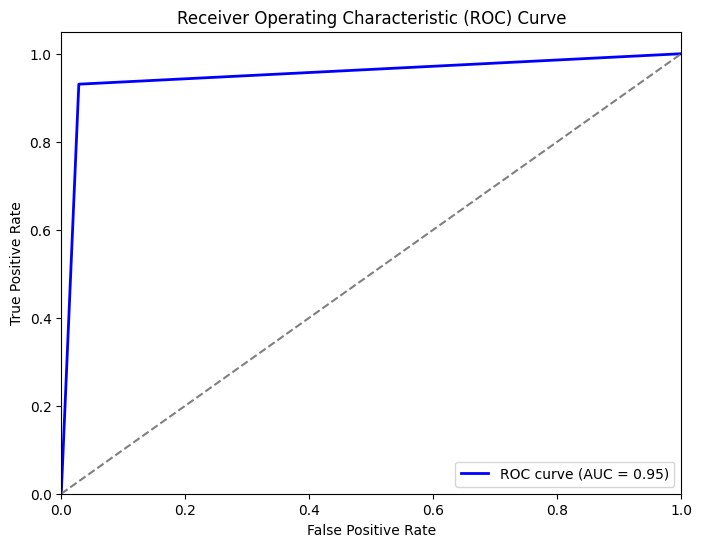

In [ ]:
plot_ROC(fpr, tpr, roc_auc, 'Receiver Operating Characteristic (ROC) Curve')

#Remove outlier

In [ ]:
x_train.shape, y_train.shape, outliers.shape

((11941, 5), (11941,), (2985, 5))

In [ ]:
def Clear_Dataset(x_train, y_train, outliers):

  X_pca_cupy = np.asarray(x_train)

  # Find indices of outliers in X
  outlier_indices = np.isin(X_pca_cupy, outliers).any(axis=1)

  # Remove outliers from X
  X_pca_without_outliers = x_train[~outlier_indices]

  y_labels_without_outliers = y_train[~outlier_indices]

  return X_pca_without_outliers, y_labels_without_outliers

In [ ]:
x_train, y_train=Clear_Dataset(x_train, y_train, outliers)

In [ ]:
outliers.shape, x_train.shape

((2985, 5), (8956, 5))

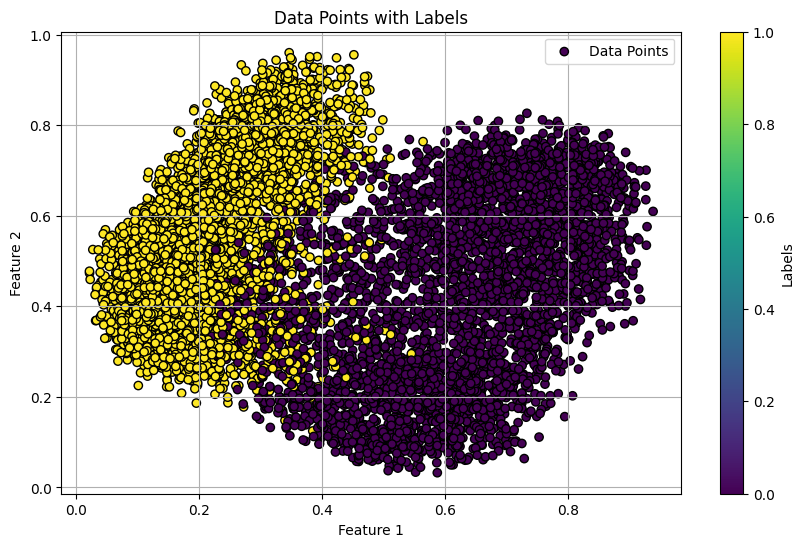

In [ ]:
plot_Dataset(x_train,y_train)

#Classifer

#Random forest

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8956, 5), (8956,), (1938, 5), (1938,))

In [ ]:
# Function to plot decision boundary
def plot_decision_boundary(X, y, classifier, title):
    # Define ranges for the meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Predict the labels for each point in the meshgrid
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split

def RandomForest_Classifier(x_train, y_train, x_test, y_test):
  rf_classifier = RandomForestClassifier()

  # Train the classifier
  rf_classifier.fit(x_train, y_train)

  # Make predictions on the test set
  predictions = rf_classifier.predict(x_test)

  # Calculate precision and recall
  precision = precision_score(y_test, predictions)
  recall = recall_score(y_test, predictions)
  accuracy = accuracy_score(y_test, predictions)

  # Print the precision, recall, and accuracy
  print("Precision:", precision)
  print("Recall:", recall)
  print("Accuracy:", accuracy)


  # Calculate false positive rate, true positive rate, and thresholds
  fpr, tpr, thresholds = roc_curve(y_test, predictions)

  # Calculate AUC
  auc = roc_auc_score(y_test, predictions)

  plot_ROC(fpr, tpr, auc, 'ROC Curve(Random Forest)')

  return rf_classifier

Precision: 0.897136797454931
Recall: 0.8830897703549061
Accuracy: 0.8921568627450981


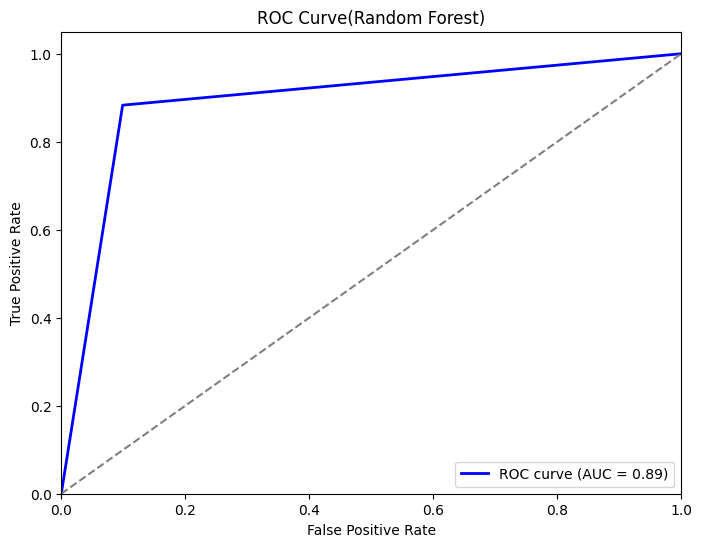

In [ ]:
rf_classfier = RandomForest_Classifier(X, Y, x_test, y_test)

In [ ]:
# plot_decision_boundary(x_test, y_test, rf_classifier, "Decision Boundary of Random Forest Classifier")

Precision: 0.9
Recall: 0.9018789144050104
Accuracy: 0.9019607843137255


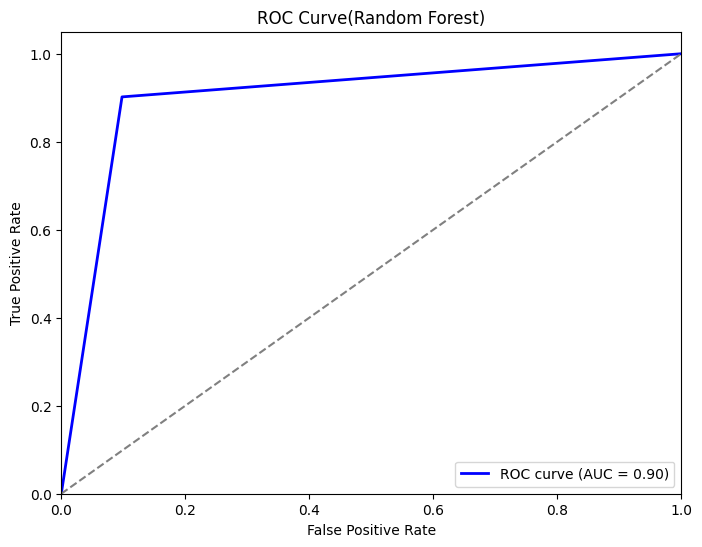

In [ ]:
rf_classifier = RandomForest_Classifier(x_train, y_train, x_test, y_test)

In [ ]:
# plot_decision_boundary(x_test, y_test, rf_classifier, "Decision Boundary of Random Forest Classifier")

#Logistic regression

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split

def LogisticRegression_Classifier(x_train, y_train, x_test, y_test):

  lr_classifier = LogisticRegression()

  # Train the classifier
  lr_classifier.fit(x_train, y_train)

  # Make predictions on the test set
  predictions = lr_classifier.predict(x_test)

  # Calculate precision and recall
  precision = precision_score(y_test, predictions)
  recall = recall_score(y_test, predictions)
  accuracy = accuracy_score(y_test, predictions)

  # Print the precision, recall, and accuracy
  print("Precision:", precision)
  print("Recall:", recall)
  print("Accuracy:", accuracy)


  # Calculate false positive rate, true positive rate, and thresholds
  fpr, tpr, thresholds = roc_curve(y_test, predictions)

  # Calculate AUC
  auc = roc_auc_score(y_test, predictions)

  plot_ROC(fpr, tpr, auc, 'ROC Curve(Random Forest)')

  return lr_classifier

Precision: 0.8401913875598086
Recall: 0.9164926931106472
Accuracy: 0.8725490196078431


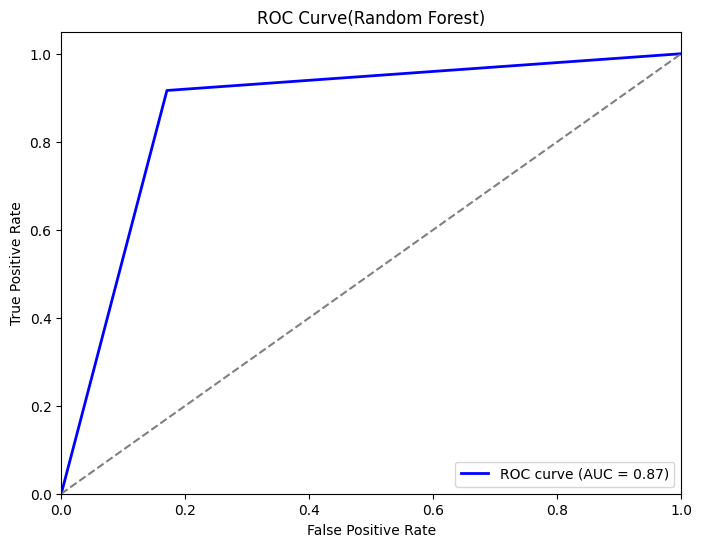

In [ ]:
lr_classifier = LogisticRegression_Classifier(X, Y, x_test, y_test)

In [ ]:
# plot_decision_boundary(x_test, y_test, lr_classifier, "Decision Boundary of Logistic regression Classifier")

Precision: 0.8672654690618763
Recall: 0.907098121085595
Accuracy: 0.8854489164086687


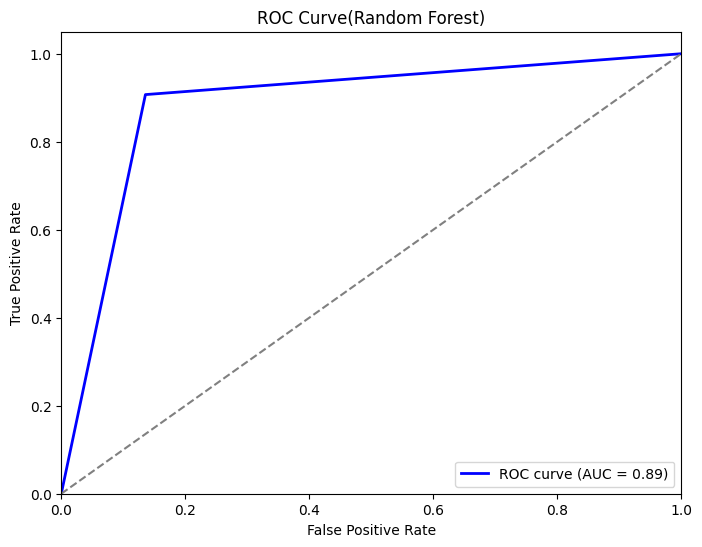

In [ ]:
lr_classifier = LogisticRegression_Classifier(x_train, y_train, x_test, y_test)

In [ ]:
# plot_decision_boundary(x_test, y_test, lr_classifier, "Decision Boundary of Logistic regression Classifier")

#Create Smaller Dataset

In [ ]:
# Import necessary libraries
import tensorflow as tf

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

def create_Dataset(x_train, y_train, x_test, y_test):
    # Flatten the images
    X_train_flat = x_train.reshape(x_train.shape[0], -1)
    X_test_flat = x_test.reshape(x_test.shape[0], -1)

    # Select 500 data points from classes 0 and 6
    selected_indices_train = np.where((y_train == 0) | (y_train == 6))[0]
    np.random.shuffle(selected_indices_train)
    X_selected_train = X_train_flat[selected_indices_train[:500]]
    y_selected_train = y_train[selected_indices_train[:500]]

    # X_train_flat = x_train.reshape(x_train.shape[0], -1)
    # X_test_flat = x_test.reshape(x_test.shape[0], -1)

    # Select 500 data points from classes 0 and 6
    selected_indices_train = np.where((y_test == 0) | (y_test == 6))[0]
    np.random.shuffle(selected_indices_train)
    X_selected_test = X_test_flat[selected_indices_train[:125]]
    y_selected_test = y_test[selected_indices_train[:125]]

    # Select 20 data points from class 8, with 10 classified as 0 and 10 classified as 6
    selected_indices_class_8 = np.where(y_train == 8)[0]
    np.random.shuffle(selected_indices_class_8)
    X_selected_class_8 = X_train_flat[selected_indices_class_8[:20]]
    y_selected_class_8 = np.zeros(20)  # Assign label 0 to the first 10 data points
    y_selected_class_8[10:] = 1  # Assign label 1 to the next 10 data points

    flag = np.zeros((X_selected_train.shape[0],))
    flag8 = np.ones((20,))
    # Combine data points from classes 0, 6, and 8
    X_selected_train = np.concatenate((X_selected_train, X_selected_class_8), axis=0)
    y_selected_train = np.concatenate((y_selected_train, y_selected_class_8), axis=0)
    flag = np.concatenate((flag, flag8), axis=0)

    # Shuffle the combined data
    shuffled_indices_train = np.random.permutation(len(X_selected_train))
    X_selected_train = X_selected_train[shuffled_indices_train]
    y_selected_train = y_selected_train[shuffled_indices_train]

    # Replace label 6 with 1
    y_selected_train[y_selected_train == 6] = 1
    y_selected_test[y_selected_test == 6] = 1

    # Apply PCA
    pca = PCA(n_components=5)  # Keep 95% of variance
    X_selected_train_pca = pca.fit_transform(X_selected_train)
    X_selected_test_pca = pca.transform(X_selected_test)

    # Normalize the data
    scaler = MinMaxScaler()
    X_selected_train_pca_normalized = scaler.fit_transform(X_selected_train_pca)
    X_selected_test_pca_normalized = scaler.transform(X_selected_test_pca)

    return X_selected_train_pca_normalized, y_selected_train, X_selected_test_pca_normalized, y_selected_test, flag


In [ ]:
x_train, y_train, x_test, y_test, flag = create_Dataset(x_train, y_train, x_test, y_test)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape, flag.shape

((520, 5), (520,), (125, 5), (125,), (520,))

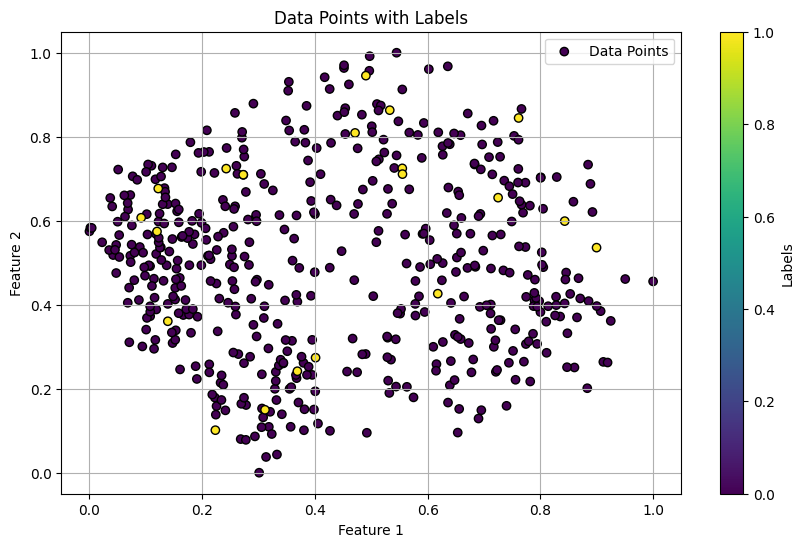

In [ ]:
plot_Dataset(x_train, flag)

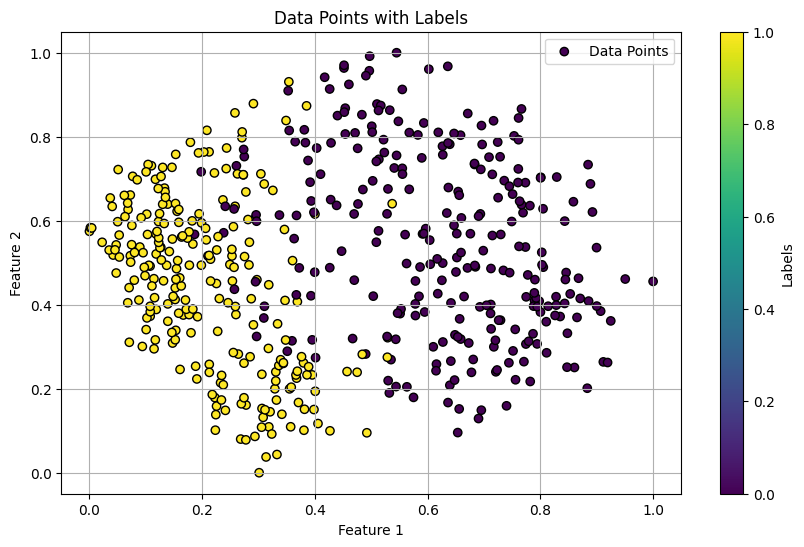

In [ ]:
plot_Dataset(x_train, y_train)

In [ ]:
X=x_train
Y=y_train
Xt=x_test
Yt=y_test

In [ ]:
import numpy as np

# Example data
data =x_train #np.random.randn(100, 2)  # Generate random 2D data

# Initialize GaussianMixtureModel object
gmm_model = GaussianMixtureModel()

# Estimate parameters (means, covariances, weights) of the Gaussian Mixture Model
means, covariances, weights = gmm_model.estimate_parameters(data, k=2)

# Predict outlier probabilities
outlier_probabilities = gmm_model.gmm_predict(data, means, covariances, weights)


In [ ]:
predicted = classify_data(x_train, means, covariances, weights)

In [ ]:
import numpy as np

# Example data
data =x_train #np.random.randn(100, 2)  # Generate random 2D data

# Initialize GaussianMixtureModel object
gmm_model = GaussianMixtureModel()

# Estimate parameters (means, covariances, weights) of the Gaussian Mixture Model
means, covariances, weights = gmm_model.estimate_parameters(data, k=2)

# Predict outlier probabilities
outlier_probabilities = gmm_model.gmm_predict(data, means, covariances, weights)

In [ ]:
threshold = np.percentile(outlier_probabilities, 75)

In [ ]:
# Find outlier indices
outlier_indices = np.where(outlier_probabilities > threshold)[0]

# Extract outlier data
outliers = x_train[outlier_indices]

# Find indices where flag == 1
flagged_indices = np.where(flag == 1)[0]

# Extract data points where flag == 1
flagged_data = x_train[flagged_indices]

# Compare outliers with flagged data
common_outliers = np.intersect1d(outlier_indices, flagged_indices)

# Print or use common_outliers as needed
print("Indices of outliers also flagged:", common_outliers)


Indices of outliers also flagged: [501 503 510 511 512 515]


In [ ]:
x_train.shape, outlier_indices.shape, flagged_indices.shape, common_outliers.shape

((520, 5), (130,), (20,), (6,))

In [ ]:
# Given values
TP = common_outliers.shape[0]#42
FP = outlier_indices.shape[0]-common_outliers.shape[0]#2943
TN = x_train.shape[0]-(flagged_indices.shape[0]+FP)#8998
FN = flagged_indices.shape[0]-common_outliers.shape[0]#58

# Calculate metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print metrics
print("Accuracy:", accuracy)


Accuracy: 0.7346153846153847


In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_train, predicted)
roc_auc = auc(fpr, tpr)

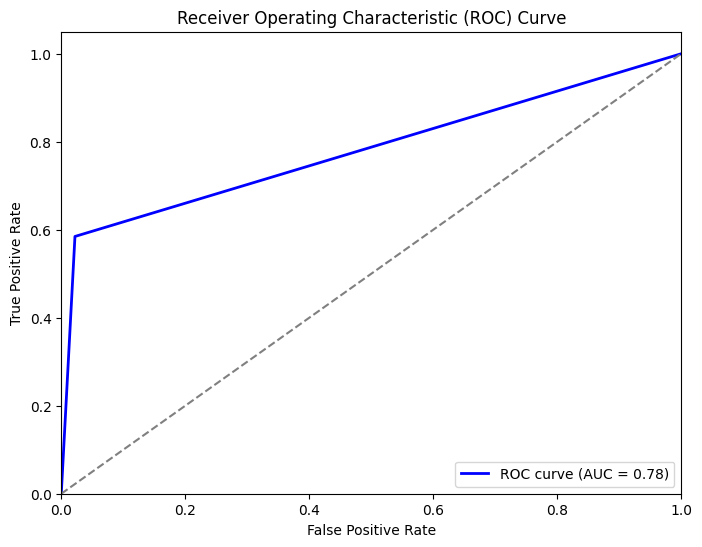

In [ ]:
plot_ROC(fpr, tpr, roc_auc, 'Receiver Operating Characteristic (ROC) Curve')

In [ ]:
x_train.shape, y_train.shape, outliers.shape

((520, 5), (520,), (130, 5))

In [ ]:
x_train, y_train=Clear_Dataset(x_train, y_train, outliers)

In [ ]:
outliers.shape, x_train.shape

((130, 5), (386, 5))

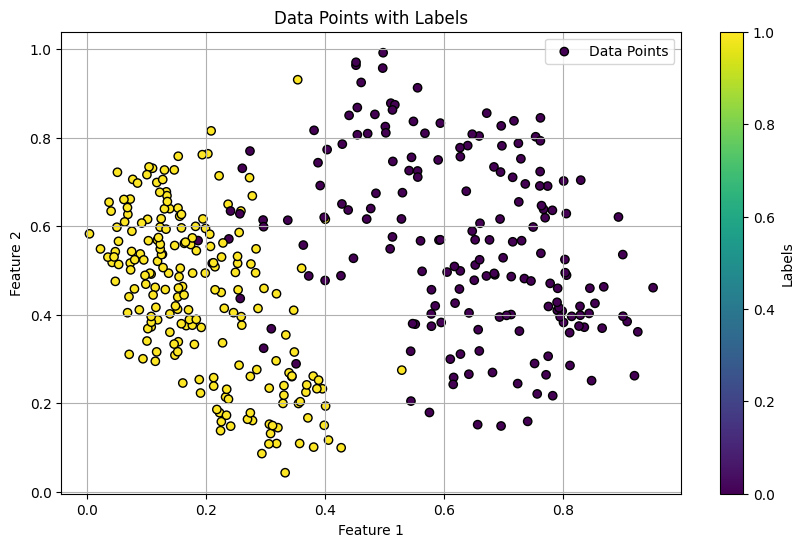

In [ ]:
plot_Dataset(x_train,y_train)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((386, 5), (386,), (125, 5), (125,))

Precision: 0.9016393442622951
Recall: 0.8461538461538461
Accuracy: 0.872


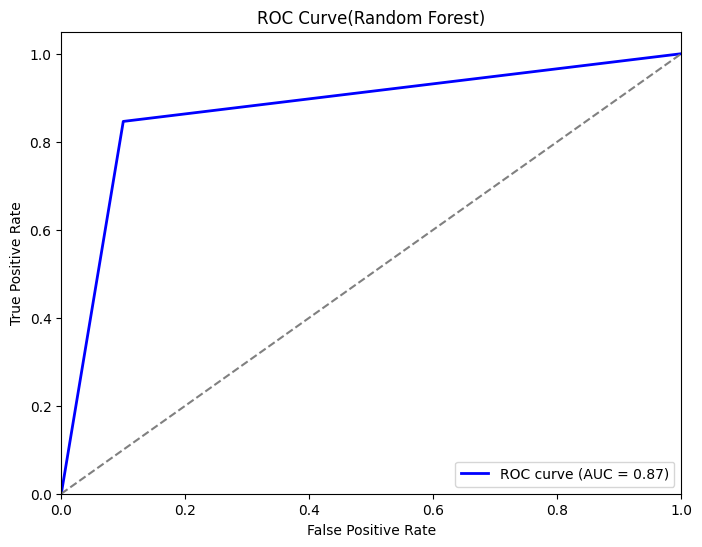

In [ ]:
rf_classfier = RandomForest_Classifier(X, Y, x_test, y_test)

Precision: 0.9193548387096774
Recall: 0.8769230769230769
Accuracy: 0.896


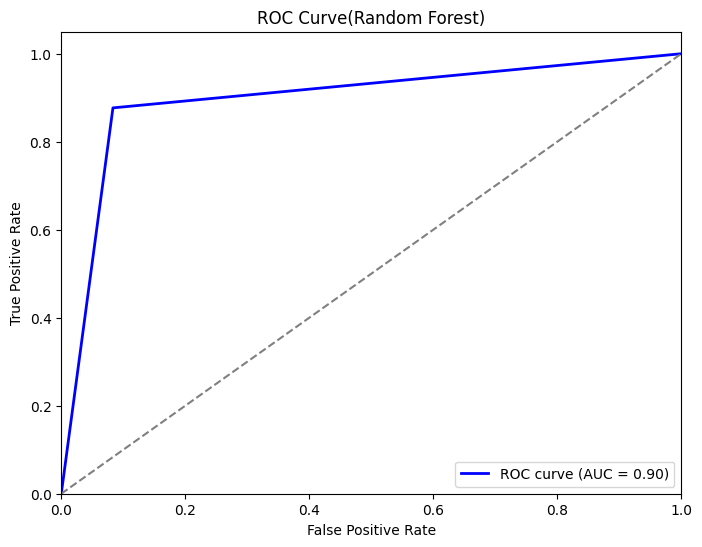

In [ ]:
rf_classifier = RandomForest_Classifier(x_train, y_train, x_test, y_test)

Precision: 0.8450704225352113
Recall: 0.9230769230769231
Accuracy: 0.872


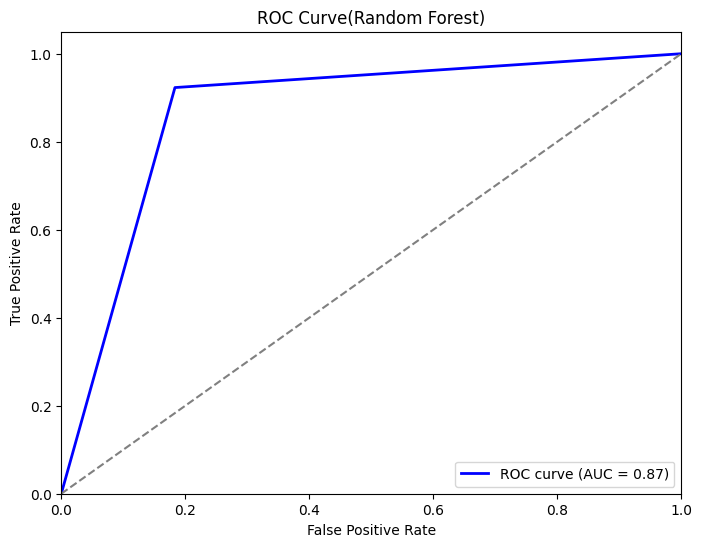

In [ ]:
lr_classifier = LogisticRegression_Classifier(X, Y, x_test, y_test)

Precision: 0.8695652173913043
Recall: 0.9230769230769231
Accuracy: 0.888


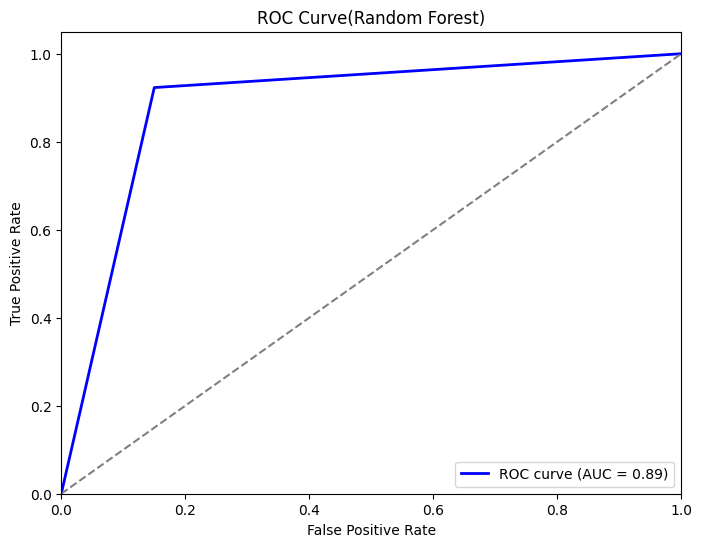

In [ ]:
lr_classifier = LogisticRegression_Classifier(x_train, y_train, x_test, y_test)

#Hiericical clustering

In [ ]:
import math
import numpy as np

class AgglomerativeHierarchicalClustering:
    def __init__(self, data, K, M):
        self.data = data
        self.N = len(data)
        self.K = K
        self.measure = self.get_distance_measure(M)
        self.clusters = self.init_clusters()

    def init_clusters(self):
        return {data_id: [data_point] for data_id, data_point in enumerate(self.data)}

    def get_distance_measure(self, M):
        if M == 0:
            return self.single_link
        elif M == 1:
            return self.complete_link
        else:
            return self.average_link

    def single_link(self, ci, cj):
        return min([self.distance(vi, vj) for vi in ci for vj in cj])

    def complete_link(self, ci, cj):
        return max([self.distance(vi, vj) for vi in ci for vj in cj])

    def average_link(self, ci, cj):
        distances = [self.distance(vi, vj) for vi in ci for vj in cj]
        return sum(distances) / len(distances)

    def distance(self, p, q):
        return math.sqrt(sum([(pi - qi)**2 for pi, qi in zip(p, q)]))

    def find_closest_clusters(self):
        min_dist = math.inf
        closest_clusters = None

        clusters_ids = list(self.clusters.keys())

        for i, cluster_i in enumerate(clusters_ids[:-1]):
            for j, cluster_j in enumerate(clusters_ids[i+1:]):
                dist = self.measure(self.clusters[cluster_i], self.clusters[cluster_j])
                if dist < min_dist:
                    min_dist, closest_clusters = dist, (cluster_i, cluster_j)
        return closest_clusters

    def merge_and_form_new_clusters(self, ci_id, cj_id):
        new_clusters = {0: self.clusters[ci_id] + self.clusters[cj_id]}
        for cluster_id in self.clusters.keys():
            if (cluster_id == ci_id) or (cluster_id == cj_id):
                continue
            new_clusters[len(new_clusters.keys())] = self.clusters[cluster_id]
        return new_clusters

    def run_algorithm(self):
        while len(self.clusters.keys()) > self.K:
            closest_clusters = self.find_closest_clusters()
            self.clusters = self.merge_and_form_new_clusters(*closest_clusters)

    def calculate_centroids(self):
        centroids = []
        for cluster_points in self.clusters.values():
            centroid = np.mean(cluster_points, axis=0)
            centroids.append(centroid)
        return centroids

    def calculate_num_data_points(self):
        counts = [len(cluster_points) for cluster_points in self.clusters.values()]
        return counts

    def get_centroids(self):
        return self.calculate_centroids()



#Single Link

In [ ]:
x_train = XX
y_train = YY

In [ ]:
clusterer = AgglomerativeHierarchicalClustering(x_train, K=2, M=0)
clusterer.run_algorithm()
centroids_data = clusterer.get_centroids()
print("Centroids:", centroids_data)

Centroids: [array([0.42461706, 0.47758942, 0.44788625, 0.45890727, 0.36385864]), array([0.68350895, 0.12810944, 0.55335842, 0.5516041 , 0.76175511])]


In [ ]:
import numpy as np

# Example data
data =x_train #np.random.randn(100, 2)  # Generate random 2D data

# Initialize GaussianMixtureModel object
gmm_model = GaussianMixtureModel()

# Estimate parameters (means, covariances, weights) of the Gaussian Mixture Model
means, covariances, weights = gmm_model.estimate_parameters(data, k=2,centroid=centroids_data)

# Predict outlier probabilities
outlier_probabilities = gmm_model.gmm_predict(data, means, covariances, weights)


In [ ]:
predicted = classify_data(x_train, means, covariances, weights)

In [ ]:
# Assign labels based on outlier probabilities
threshold = np.percentile(outlier_probabilities, 75)


In [ ]:
# Find outlier indices
outlier_indices = np.where(outlier_probabilities > threshold)[0]

# Extract outlier data
outliers = x_train[outlier_indices]

# Find indices where flag == 1
flagged_indices = np.where(flag == 1)[0]

# Extract data points where flag == 1
flagged_data = x_train[flagged_indices]

# Compare outliers with flagged data
common_outliers = np.intersect1d(outlier_indices, flagged_indices)

# Print or use common_outliers as needed
print("Indices of outliers also flagged:", common_outliers)


Indices of outliers also flagged: [510 512 514 516 517]


In [ ]:
x_train.shape, outlier_indices.shape, flagged_indices.shape, common_outliers.shape

((520, 5), (130,), (20,), (5,))

In [ ]:
# Given values
TP = common_outliers.shape[0]#42
FP = outlier_indices.shape[0]-common_outliers.shape[0]#2943
TN = x_train.shape[0]-(flagged_indices.shape[0]+FP)#8998
FN = flagged_indices.shape[0]-common_outliers.shape[0]#58

# Calculate metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print metrics
print("Accuracy:", accuracy)


Accuracy: 0.7307692307692307


In [ ]:
x_train, y_train=Clear_Dataset(x_train, y_train, outliers)

Precision: 0.9827586206896551
Recall: 0.9193548387096774
Accuracy: 0.952


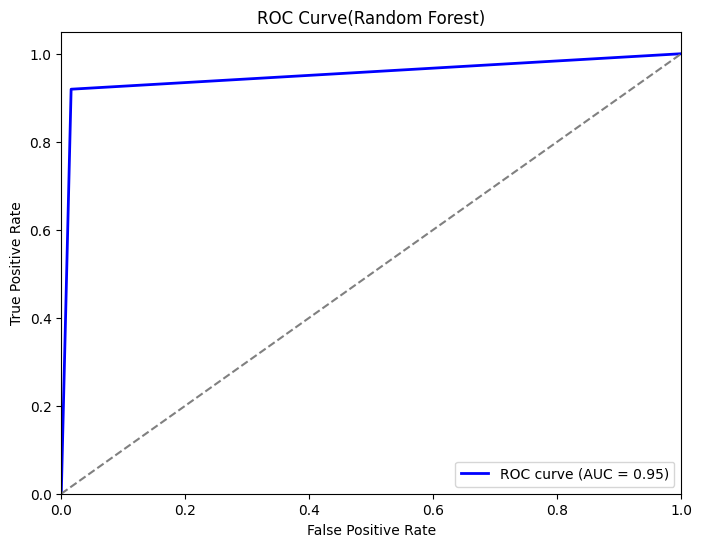

In [ ]:
rf_classifier = RandomForest_Classifier(x_train, y_train, x_test, y_test)

Precision: 0.9666666666666667
Recall: 0.9354838709677419
Accuracy: 0.952


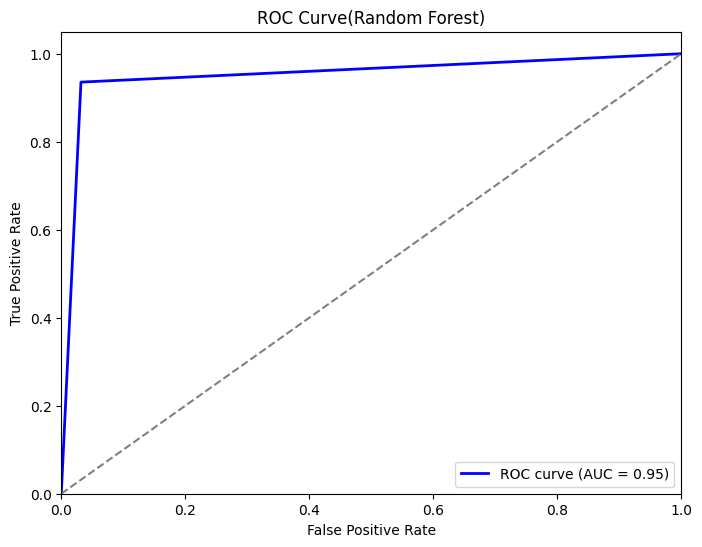

In [ ]:
rf_classfier = RandomForest_Classifier(XX, YY, x_test, y_test)

Precision: 0.9672131147540983
Recall: 0.9516129032258065
Accuracy: 0.96


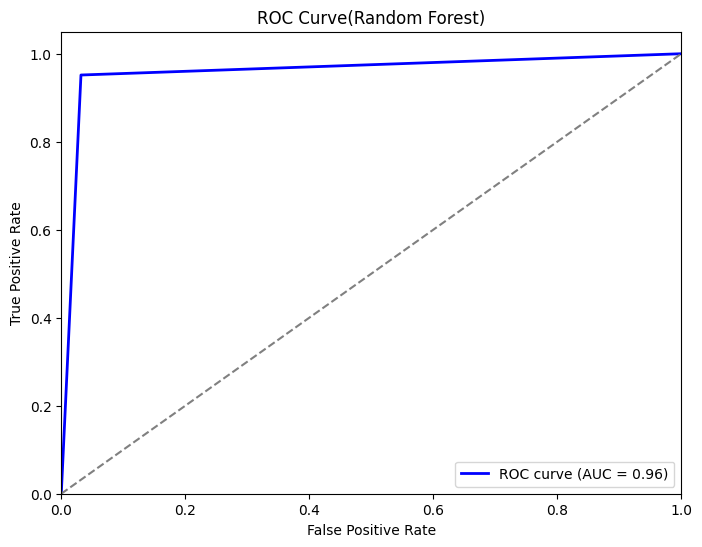

In [ ]:
lr_classifier = LogisticRegression_Classifier(x_train, y_train, x_test, y_test)

Precision: 0.9827586206896551
Recall: 0.9193548387096774
Accuracy: 0.952


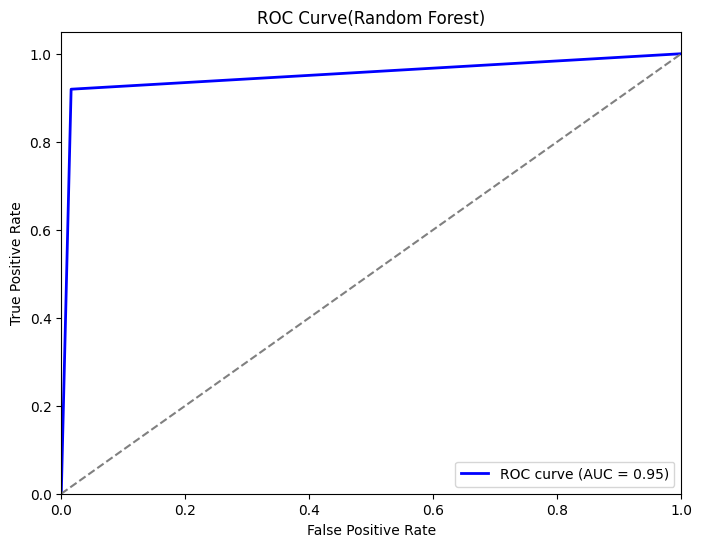

In [ ]:
lr_classifier = LogisticRegression_Classifier(XX, YY, x_test, y_test)

#Complete

In [ ]:
x_train = XX
y_train = YY

In [ ]:
clusterer = AgglomerativeHierarchicalClustering(x_train, K=2, M=1)
clusterer.run_algorithm()
centroids_data = clusterer.get_centroids()
print("Centroids:", centroids_data)

Centroids: [array([0.42222359, 0.4772762 , 0.44365799, 0.45813166, 0.36046411]), array([0.72292279, 0.43995525, 0.90449188, 0.55733411, 0.79307379])]


In [ ]:
import numpy as np

# Example data
data =x_train #np.random.randn(100, 2)  # Generate random 2D data

# Initialize GaussianMixtureModel object
gmm_model = GaussianMixtureModel()

# Estimate parameters (means, covariances, weights) of the Gaussian Mixture Model
means, covariances, weights = gmm_model.estimate_parameters(data, k=2,centroid=centroids_data)

# Predict outlier probabilities
outlier_probabilities = gmm_model.gmm_predict(data, means, covariances, weights)

In [ ]:
predicted = classify_data(x_train, means, covariances, weights)

In [ ]:
threshold = np.percentile(outlier_probabilities, 75)


In [ ]:
# Find outlier indices
outlier_indices = np.where(outlier_probabilities > threshold)[0]

# Extract outlier data
outliers = x_train[outlier_indices]

# Find indices where flag == 1
flagged_indices = np.where(flag == 1)[0]

# Extract data points where flag == 1
flagged_data = x_train[flagged_indices]

# Compare outliers with flagged data
common_outliers = np.intersect1d(outlier_indices, flagged_indices)

# Print or use common_outliers as needed
print("Indices of outliers also flagged:", common_outliers)


Indices of outliers also flagged: [510 512 514 516 517]


In [ ]:
x_train.shape, outlier_indices.shape, flagged_indices.shape, common_outliers.shape

((520, 5), (130,), (20,), (5,))

In [ ]:
# Given values
TP = common_outliers.shape[0]#42
FP = outlier_indices.shape[0]-common_outliers.shape[0]#2943
TN = x_train.shape[0]-(flagged_indices.shape[0]+FP)#8998
FN = flagged_indices.shape[0]-common_outliers.shape[0]#58

# Calculate metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print metrics
print("Accuracy:", accuracy)

Accuracy: 0.7307692307692307


In [ ]:
x_train, y_train=Clear_Dataset(x_train, y_train, outliers)

Precision: 0.9661016949152542
Recall: 0.9193548387096774
Accuracy: 0.944


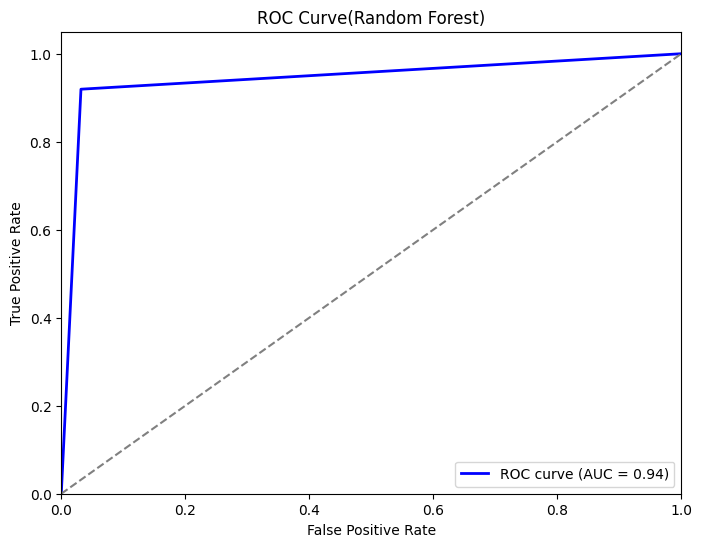

In [ ]:
rf_classfier = RandomForest_Classifier(XX, YY, x_test, y_test)

Precision: 0.9830508474576272
Recall: 0.9354838709677419
Accuracy: 0.96


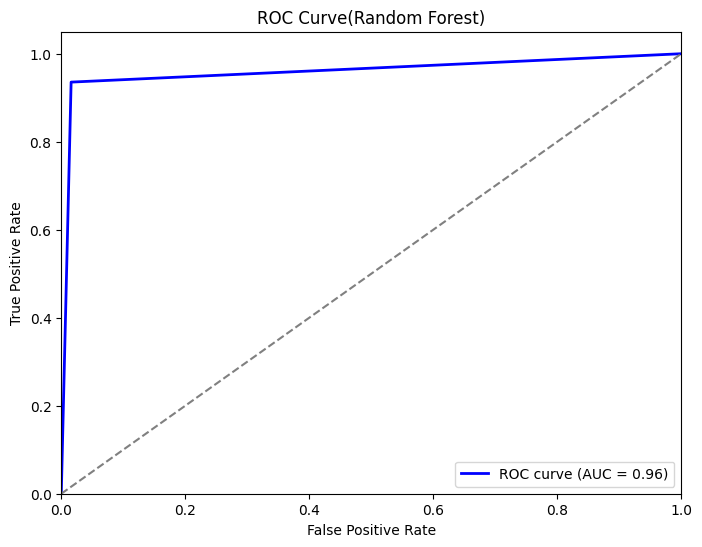

In [ ]:
rf_classifier = RandomForest_Classifier(x_train, y_train, x_test, y_test)

Precision: 0.9672131147540983
Recall: 0.9516129032258065
Accuracy: 0.96


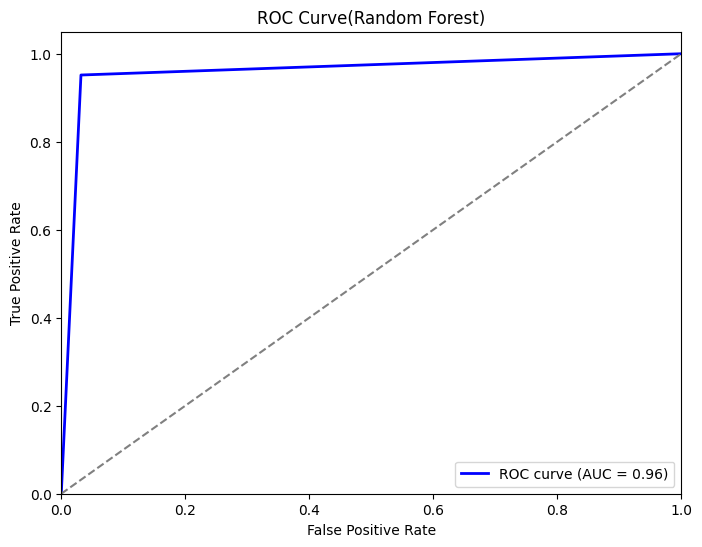

In [ ]:
lr_classifier = LogisticRegression_Classifier(x_train, y_train, x_test, y_test)

Precision: 0.9827586206896551
Recall: 0.9193548387096774
Accuracy: 0.952


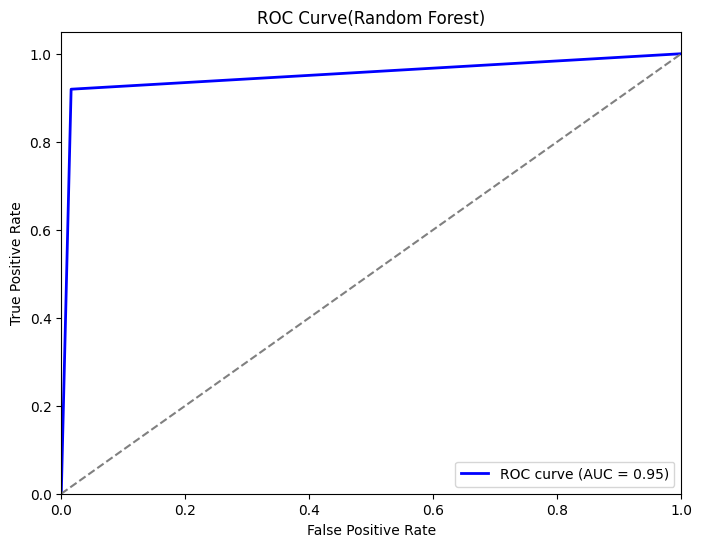

In [ ]:
lr_classifier = LogisticRegression_Classifier(XX, YY, x_test, y_test)

#Average

In [ ]:
x_train = XX
y_train = YY

In [ ]:
clusterer = AgglomerativeHierarchicalClustering(x_train, K=2, M=2)
clusterer.run_algorithm()
centroids_data = clusterer.get_centroids()
print("Centroids:", centroids_data)

Centroids: [array([0.42103113, 0.47899087, 0.44286185, 0.45952706, 0.35821473]), array([0.68647796, 0.34421166, 0.78263231, 0.43082746, 0.77480569])]


In [ ]:
import numpy as np

# Example data
data =x_train #np.random.randn(100, 2)  # Generate random 2D data

# Initialize GaussianMixtureModel object
gmm_model = GaussianMixtureModel()

# Estimate parameters (means, covariances, weights) of the Gaussian Mixture Model
means, covariances, weights = gmm_model.estimate_parameters(data, k=2,centroid=centroids_data)

# Predict outlier probabilities
outlier_probabilities = gmm_model.gmm_predict(data, means, covariances, weights)


In [ ]:
predicted = classify_data(x_train, means, covariances, weights)

In [ ]:
threshold = np.percentile(outlier_probabilities, 75)


In [ ]:
# Find outlier indices
outlier_indices = np.where(outlier_probabilities > threshold)[0]

# Extract outlier data
outliers = x_train[outlier_indices]

# Find indices where flag == 1
flagged_indices = np.where(flag == 1)[0]

# Extract data points where flag == 1
flagged_data = x_train[flagged_indices]

# Compare outliers with flagged data
common_outliers = np.intersect1d(outlier_indices, flagged_indices)

# Print or use common_outliers as needed
print("Indices of outliers also flagged:", common_outliers)


Indices of outliers also flagged: [510 512 514 516 517]


In [ ]:
x_train.shape, outlier_indices.shape, flagged_indices.shape, common_outliers.shape

((520, 5), (130,), (20,), (5,))

In [ ]:
# Given values
TP = common_outliers.shape[0]#42
FP = outlier_indices.shape[0]-common_outliers.shape[0]#2943
TN = x_train.shape[0]-(flagged_indices.shape[0]+FP)#8998
FN = flagged_indices.shape[0]-common_outliers.shape[0]#58

# Calculate metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)

print("Accuracy:", accuracy)


Accuracy: 0.7307692307692307


In [ ]:
x_train, y_train=Clear_Dataset(x_train, y_train, outliers)

Precision: 0.9672131147540983
Recall: 0.9516129032258065
Accuracy: 0.96


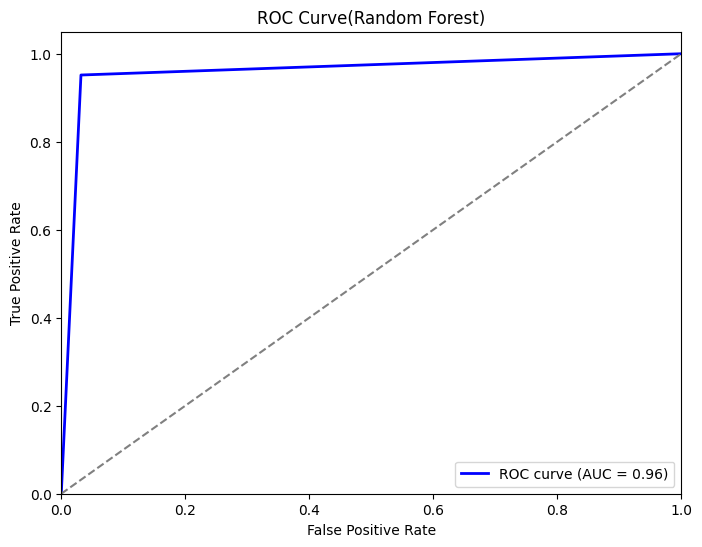

In [ ]:
rf_classifier = RandomForest_Classifier(x_train, y_train, x_test, y_test)

Precision: 0.9827586206896551
Recall: 0.9193548387096774
Accuracy: 0.952


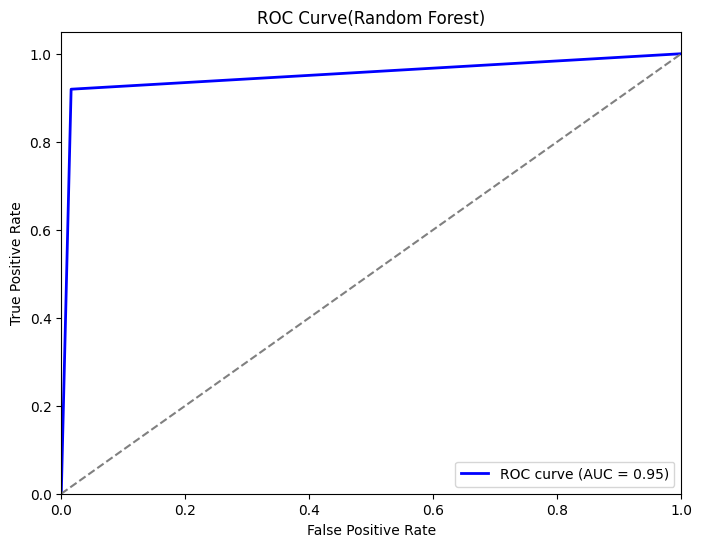

In [ ]:
rf_classfier = RandomForest_Classifier(XX, YY, x_test, y_test)

Precision: 0.9672131147540983
Recall: 0.9516129032258065
Accuracy: 0.96


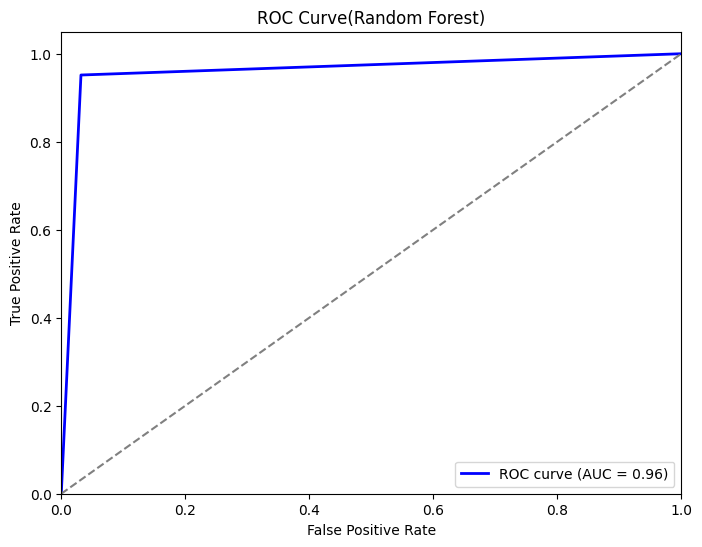

In [ ]:
lr_classifier = LogisticRegression_Classifier(x_train, y_train, x_test, y_test)

Precision: 0.9827586206896551
Recall: 0.9193548387096774
Accuracy: 0.952


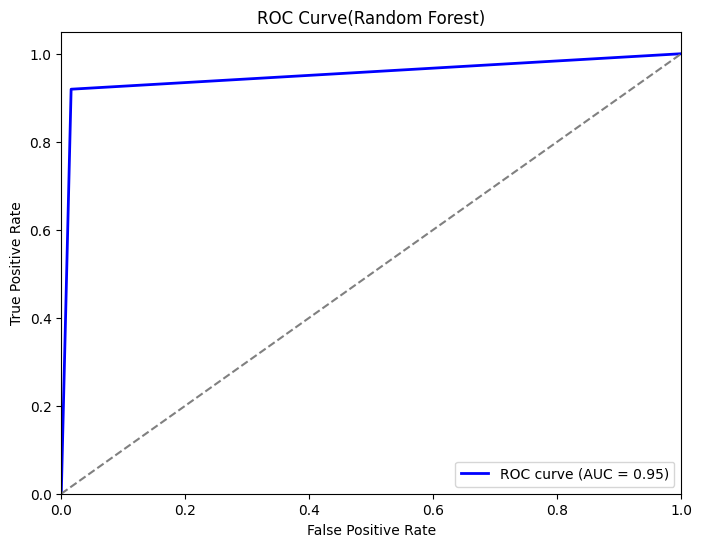

In [ ]:
lr_classifier = LogisticRegression_Classifier(XX, YY, x_test, y_test)